<h2>About this Project</h2>

**In this project, you will calculate the logistic loss.** In the next projects, you will calculate the gradient of the logistic loss function and implement gradient descent. You will ultimately use all these functions in the final project to create a logistic regression classifier that can "filter" spam email messages.

<h3>Evaluation</h3>

<p><strong>This project must be successfully completed and submitted in order to receive credit for this course. Your score on this project will be included in your final grade calculation.</strong><p>
    
<p>You are expected to write code where you see <em># YOUR CODE HERE</em> within the cells of this notebook. Not all cells will be graded; code input cells followed by cells marked with <em>#Autograder test cell</em> will be graded. Upon submitting your work, the code you write at these designated positions will be assessed using an "autograder" that will run all test cells to assess your code. You will receive feedback from the autograder that will identify any errors in your code. Use this feedback to improve your code if you need to resubmit. Be sure not to change the names of any provided functions, classes, or variables within the existing code cells, as this will interfere with the autograder. Also, remember to execute all code cells sequentially, not just those you’ve edited, to ensure your code runs properly.</p>
    
<p>You can resubmit your work as many times as necessary before the submission deadline. If you experience difficulty or have questions about this exercise, use the Q&A discussion board (found in the Live Labs section of this course) to engage with your peers or seek assistance from the instructor.<p>

<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>

<h3>Submit Code for Autograder Feedback</h3>

<p>Once you have completed your work on this notebook, you will submit your code for autograder review. Follow these steps:</p>

<ol>
    <li><strong>Save your notebook —</strong> Click <strong>Save and Checkpoint</strong> in the "File" menu.</li>
  <li><strong>Mark as Completed —</strong> In the blue menu bar along the top of this code exercise window, you’ll see a menu item called <strong>Education</strong>. In the <strong>Education</strong> menu, click <strong>Mark as Completed</strong> to submit your code for autograder/instructor review. This process will take a moment and a progress bar will show you the status of your submission.</li>
	<li><strong>Review your results —</strong> Once your work is marked as complete, the results of the autograder will automatically be presented in a new tab within the code exercise window. You can click on the assessment name in this feedback window to see more details regarding specific feedback/errors in your code submission.</li>
  <li><strong>Repeat, if necessary —</strong> The Jupyter notebook will always remain accessible in the first tabbed window of the exercise. To reattempt the work, you will first need to click <strong>Mark as Uncompleted</strong> in the <strong>Education</strong> menu and then proceed to make edits to the notebook. Once you are ready to resubmit, follow steps one through three. You can repeat this procedure as many times as necessary.</li>
</ol>

<h2>Getting Started</h2>
<h3>Python Initialization</h3> 

Please run the following code to initialize your Python kernel. You should be running a version of Python 3.x. </p>

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

from helper import *

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.8


## Build a Spam Email Classifier - Project 1 (Logistic Loss)

Rather than working directly on the email data, we will first build some intuition about logistic regression using random data. Let's approach the spam email classification problem from the end-goal.

What will be our inputs and outputs? Our input ultimately will be email text data or metadata, and the classifier should process one email (an input data point) to output 'spam' or 'not spam'. How can we represent the inputs and outputs in a machine-readable form? We can convert text data into a $d$-dimensional numeric vector (such as by using the hashing technique, which you might remember from a previous course). For outputs, we can represent the 'spam' or 'not spam' with binary (-1/1) labels.

Since our problem is a binary classification problem on numeric features, we can now abstract away the actual dataset and use an artificial dataset created randomly. For visualization purposes, we will limit ourselves to 2-dimensional feature vector when working with an artificial dataset.

One way to generate 2D random data for 2 classes is by using non-overlapping multivariate normal distributions. This should be very easily separable for logistic regression.

In [2]:
np.random.seed(12)
n_samples = 500

covariance = [[1, .25],
              [.25, 1]]
class_one = np.random.multivariate_normal(mean=[5, 10], cov=covariance, size=n_samples)
class_one_labels = -np.ones(n_samples)

class_two = np.random.multivariate_normal(mean=[0, 5], cov=covariance, size=n_samples)
class_two_labels = np.ones(n_samples)

features = np.vstack((class_one, class_two))
labels = np.hstack((class_one_labels, class_two_labels))

Let's see what what our feature vectors look like. We can get statistics (count, mean, std, min, max, 25th percentile value, 50th percentile value, and 75th percentile value) of `feature_1` and `feature_2` separately for data points of each class. For `label == -1`, `feature_1` should lie around value 5 and `feature_2` should lie around value 10 (and standard deviation should be about 1). Similarly for `label == 1`.

In [3]:
print('features shape: ', features.shape)
print(features.round(3))

df = pd.DataFrame(np.vstack([labels, features[:, 0], features[:, 1]]).T, columns=['label', 'feature_1', 'feature_2'])
display(df.groupby('label').describe())

features shape:  (1000, 2)
[[ 5.043  9.209]
 [ 5.85   8.767]
 [ 5.344  8.465]
 ...
 [ 0.095  3.989]
 [ 1.811  3.701]
 [-0.096  4.075]]


feature_1                                                              \
          count      mean       std       min       25%       50%       75%   
label                                                                         
-1.0      500.0  5.014419  0.993995  1.649121  4.346935  4.952776  5.699140   
 1.0      500.0  0.084412  0.953539 -2.738306 -0.441260  0.095190  0.721055   

                feature_2                                                    \
            max     count      mean       std       min       25%       50%   
label                                                                         
-1.0   7.974849     500.0  9.987246  1.065488  6.341087  9.221692  9.961198   
 1.0   2.630407     500.0  5.027197  0.984592  2.173495  4.413505  5.010992   

                             
             75%        max  
label                        
-1.0   10.730254  12.940244  
 1.0    5.683103   7.959722

We can visualize the features for each class in a 2D scatter plot.

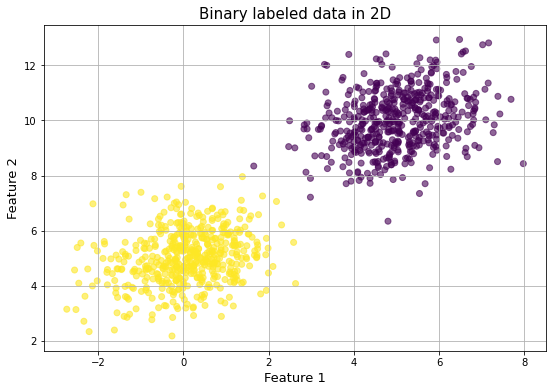

In [4]:
plt.figure(figsize=(9, 6))
plt.scatter(features[:, 0], features[:, 1],
            c=labels, alpha=.6);

plt.title("Binary labeled data in 2D", size=15);
plt.xlabel("Feature 1", size=13);
plt.ylabel("Feature 2", size=13);
plt.grid();

In logistic regression, we use _gradient ascent_ to solve for the weight vector that _maximizes_ the (log) likelihood of observing the data. As you have learned so far, this _optimal_ weight vector defines a perpendicular hyperplane that _best_ divides the data points of the two classes.

**Equivalently, we can use gradient _descent_ to solve for the weight vector that _minimizes_ the _negative_ log likelihood - refer to Module 3 if you need a review of this derivation!**

So, let's continue walking backwards from our goal. Now that we have an artificial dataset, we need to create a logistic regression classifier. For the classifier, we will need to compute the negative log likelihood (modeled using the logistic loss function) and a function to train the minimize the negative log likelihood using gradient descent.

The logistic loss uses the sigmoid function, which you will implement first. Next, you will implement $P \left(y_i | \mathbf{x}_i \right)$ using the sigmoid function, followed by the negative log likelihood. You will use these functions in the subsequent projects.

<h3>Part One: Sigmoid [Graded]</h3>

In **`sigmoid`**, implement the sigmoid function: $\sigma(z)=\frac{1}{1+e^{-z}}$.

In [10]:
def sigmoid(z):
    '''
    Calculates the sigmoid of z.
    
    Input:
        z: scalar or array of dimension n
    
    Output:
        scalar or array of dimension n
    '''
    # This one is pretty simple, hoping it doesn't require much work to be shown
    return np.reciprocal(np.ones(z.shape) + np.exp(-1*z))

In [13]:
# Test cell for sigmoid function
x = np.linspace(-10, 10, 100)
#sigmoid(x)

Let's plot the sigmoid function for values around 0. The sigmoid function should _plateau_, i.e. output almost a constant value, for negative or positive values of large magnitude.

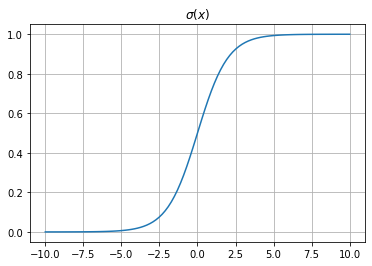

In [12]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.title('$\sigma(x)$')
plt.grid()

In [14]:
def test_sigmoid1():
    h = np.random.rand(10) # input is an 10-dimensional array
    sgmd1 = sigmoid(h)
    return sgmd1.shape == h.shape # output should be a 10-dimensional array

def test_sigmoid2():
    h = np.random.rand(10) # input is an 10-dimensional array
    sgmd1 = sigmoid(h) # compute the sigmoids with your function
    sgmd2 = sigmoid_grader(h) # compute the sigmoids with ground truth funcdtion
    return (np.linalg.norm(sgmd1 - sgmd2) < 1e-5) # check if they agree

def test_sigmoid3():
    x = np.random.rand(1) # input is a scalar
    sgmd1 = sigmoid(x) # compute the sigmoids with your function
    sgmd2 = sigmoid_grader(x) # compute the sigmoids with ground truth function
    return (np.linalg.norm(sgmd1 - sgmd2) < 1e-5) # check if they agree

def test_sigmoid4():
    x = np.array([-1e10,1e10,0]) # three input points: very negative, very positive, and 0
    sgmds = sigmoid(x) # compute the sigmoids with your function
    truth = np.array([0,1,0.5]) # the truth should be 0, 1, 0.5 exactly
    return (np.linalg.norm(sgmds - truth) < 1e-8) # test if this is true


runtest(test_sigmoid1, 'test_sigmoid1')
runtest(test_sigmoid2, 'test_sigmoid2')
runtest(test_sigmoid3, 'test_sigmoid3')
runtest(test_sigmoid4, 'test_sigmoid4')

Running Test: test_sigmoid1 ... ✔ Passed!
Running Test: test_sigmoid2 ... ✔ Passed!
Running Test: test_sigmoid3 ... ✔ Passed!
Running Test: test_sigmoid4 ... ✔ Passed!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


##### Note: you may receive a warning, 'RuntimeWarning: overflow encountered in exp.' This can be ignored.

In [15]:
# Autograder test cell - worth 1 point
# runs test_sigmoid1

In [16]:
# Autograder test cell - worth 1 point
# runs test_sigmoid2

In [17]:
# Autograder test cell - worth 1 point
# runs test_sigmoid3

In [18]:
# Autograder test cell - worth 1 point
# runs test_sigmoid4

<h3>Part Two: Implement <code>y_pred</code> [Graded]</h3>

Implement the function **`y_pred(X, w)`** that computes $P \left( y_i = 1 | \mathbf{x}_i ; \mathbf{w}, b \right)$ for each row-vector $\mathbf{x}_i$ in the matrix `X`. 

Recall that:
$$
P \left( y_i | \mathbf{x}_i; \mathbf{w}, b \right) = \sigma \left( y_i \left( \mathbf{w}^\top \mathbf{x}_i + b \right) \right)
$$

Since `y_pred` calculates the probability of the positive label +1, $\sigma \left(y_i \left( \mathbf{w}^\top \mathbf{x}_i + b \right) \right)$ simplifies to $\sigma \left( \mathbf{w}^\top \mathbf{x}_i + b \right)$, which you must output.

In [19]:
def y_pred(X, w, b=0):
    '''
    Calculates the probability of the positive class.
    
    Input:
        X: data matrix of shape nxd
        w: d-dimensional vector
        b: scalar (optional, default is 0)
    
    Output:
        n-dimensional vector
    '''
    # Again, this one is really simple, it's a direct implementation of the equation as given above
    return sigmoid(X @ w.T + b)

Let's do a sanity check for the `y_pred` function using a small test set. You can do a quick check:
> For a data point $i$, whether $P(y_i = 1)$ (`y_pred[i]`) is close to 1 or 0 when $\mathbf{w}^\top \mathbf{x}_i + b$ is greater than 0 or less than 0 respectively.

Why does the check work? Recall the output of the sigmoid function for positive and negative values. When the input to sigmoid is large and positive, the output probability is close to 1. And when the input is large and negative, the probability is close to 0.

In [20]:
n, d = 5, 3
X = np.random.randint(0, 3, (n,d))    # contains multiple observations as rows
w = np.random.randint(-3, 3, d)       # this will be our trained vector of coefficients
b = 1                                 # this will be our trained offset (or bias) scalar
pY = y_pred(X, w, b).round(2)
print(f'X = \n{X}')
print(f'w = {w}, b = {b}')
print(f'Vector of probabilities of class +1 (conditional on x and w) = {pY}')
print(f'Vector of probabilities of class -1 (conditional on x and w) = {1-pY}')

X = 
[[2 1 1]
 [2 2 1]
 [1 1 2]
 [1 2 0]
 [0 0 1]]
w = [-2  0  0], b = 1
Vector of probabilities of class +1 (conditional on x and w) = [0.05 0.05 0.27 0.27 0.73]
Vector of probabilities of class -1 (conditional on x and w) = [0.95 0.95 0.73 0.73 0.27]


In [21]:
def test_ypred1():
    n = 20
    d = 5
    X = np.random.rand(n,d) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    probs=y_pred(X,w,0) # compute the probabilities of P(y=1|x;w) using your y_pred function
    return probs.shape == (n, ) # check if all outputs are >=0 and <=1


def test_ypred2():
    n = 20
    d = 5
    X = np.random.rand(n,d) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    probs=y_pred(X, w, 0) # compute the probabilities of P(y=1|x;w) using your y_pred function
    return all(probs>=0) and all(probs<=1) # check if all outputs are >=0 and <=1

def test_ypred3():
    n = 20
    d = 5
    X = np.random.rand(n,d) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    probs1=y_pred(X, w, 0) # compute the probabilities of P(y=1|x;w) using your y_pred function
    probs2=y_pred(X,-w, 0) # compute the probabilities of P(y=1|x;w) using your y_pred function
    return np.linalg.norm(probs1+probs2-1)<1e-08 # check if P(y|x;w)+P(y|x;-w)=1



def test_ypred4():
    X=np.random.rand(25,4) # define random input
    w=np.array([1,0,0,0]) # all-zeros weight vector
    prob=y_pred(X, w, 0) # compute P(y|X;w)
    truth=sigmoid(X[:,0]) # should simply be the sigmoid of the first feature
    return np.linalg.norm(prob-truth)<1e-08 # see if they match


def test_ypred5(): 
    X=np.array([[0.61793598, 0.09367891], # define 3 inputs (2D)
               [0.79447745, 0.98605996],
               [0.53679997, 0.4253885 ]])
    w=np.array([0.9822789 , 0.16017851]); # define weight vector
    prob=y_pred(X, w, 3) # compute P(y|X;w)
    truth=np.array([0.97396645,0.98089179,0.97328431]) # this is the grount truth
    return np.linalg.norm(prob-truth)<1e-08 # see if they match

runtest(test_ypred1, 'test_ypred1')
runtest(test_ypred2, 'test_ypred2')
runtest(test_ypred3, 'test_ypred3')
runtest(test_ypred4, 'test_ypred4')
runtest(test_ypred5, 'test_ypred5')

Running Test: test_ypred1 ... ✔ Passed!
Running Test: test_ypred2 ... ✔ Passed!
Running Test: test_ypred3 ... ✔ Passed!
Running Test: test_ypred4 ... ✔ Passed!
Running Test: test_ypred5 ... ✔ Passed!


In [22]:
# Autograder test cell - worth 1 point
# runs test_ypred1

In [23]:
# Autograder test cell - worth 1 point
# runs test_ypred2

In [24]:
# Autograder test cell - worth 1 point
# runs test_ypred3

In [25]:
# Autograder test cell - worth 1 point
# runs test_ypred4

In [26]:
# Autograder test cell - worth 1 point
# runs test_ypred5

<h3>Part Three: Implement <code>log_loss</code> [Graded]</h3>

Now you will compute the negative log likelihood in **`log_loss`**. You are given the label vector `y` and the data matrix `X` with `n` data points as row vectors. The negative log likelihood ($NLL$) is defined as follows:

$$
NLL = -\log P(\mathbf{y} \vert \mathbf{X}; \mathbf{w}, b) = -\log \prod_{i=1}^n P \left(y_i | \mathbf{x}_i; \mathbf{w}, b \right) = -\sum_{i=1}^n \log P\left(y_i | \mathbf{x}_i; \mathbf{w}, b \right) = -\sum_{i=1}^n \log \sigma \left( y_i \left(\mathbf{w}^\top \mathbf{x}_i + b \right) \right).
$$

While we only computed the probability of a positive label in `y_pred`, now we will account for the actual $y$ value. You can use your implementation of `y_pred` for `log_loss` or reimplement to account for the $y$ -- the latter yields cleaner code.

In [29]:
def log_loss(X, y, w, b=0):
    '''
    Calculates the negative log likelihood for dataset (X, y) using the weight vector w and bias b.
    
    Input:
        X: data matrix of shape nxd
        y: n-dimensional vector of labels (+1 or -1)
        w: d-dimensional vector
        b: scalar (optional, default is 0)
    
    Output:
        scalar
    '''
    assert np.sum(np.abs(y)) == len(y) # check if all labels in y are either +1 or -1
    
    # This one was a bit trickier, so I made some notes first as comments, but once I had my approach sketched out,
    # it was simple to implement
    
    # use same idea as y_pred to apply sigmoid to all data points
    # use indexing to get complement of probabilities for all -1 labeled points
    # take log of all points
    # sum across entire vector
    
    preds = y_pred(X, w, b)
    preds[y == -1] = 1 - preds[y == -1]
    
    return -1*(np.sum(np.log(preds)))

In [30]:
def test_logloss1():
    X = np.random.rand(25,5) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    b = np.random.rand(1) # define a bias
    y = np.ones(25) # set labels all-(+1)
    ll=log_loss(X,y,w, b) # compute the probabilities of P(y=1|x;w) using your y_pred function
    # if labels are all-ones function becomes simply the sum of log of y_pred
    return np.isscalar(ll) # check whether the output is a scalar

def test_logloss2():
    X = np.random.rand(25,5) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    b = np.random.rand(1) # define a bias
    y = np.ones(25) # set labels all-(+1)
    ll=log_loss(X,y,w, b) # compute the probabilities of P(y=1|x;w) using your y_pred function
    ll2=-np.sum(np.log(y_pred(X, w, b))) # if labels are all-ones function becomes simply the sum of log of y_pred
    return np.linalg.norm(ll-ll2)<1e-05

def test_logloss3():
    X = np.random.rand(25,5) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    b = np.random.rand(1) # define a bias
    y = -np.ones(25) # set labels all-(-1)
    ll=log_loss(X,y,w,b) # compute the probabilities of P(y=1|x;w) using your y_pred function
    ll2=-np.sum(np.log(1-y_pred(X,w, b))) # if labels are all-ones function becomes simply the sum of log of 1-y_pred
    return np.linalg.norm(ll-ll2)<1e-05

def test_logloss4():
    X = np.random.rand(20,5) # generate n random vectors with d dimensions
    w = np.array([0,0,0,0,0]) # define an all-zeros weight vector
    y = (np.random.rand(20)>0.5)*2-1; # define n random labels (+1 or -1)
    ll=log_loss(X,y,w,0) # compute the probabilities of P(y=1|x;w) using your y_pred function
    # the log-likelihood for each of the 20 examples should be exactly 0.5:
    return np.linalg.norm(ll+20*np.log(0.5))<1e-08 

def test_logloss5():
    X = np.random.rand(500,15) # generate n random vectors with d dimensions
    w = np.random.rand(15) # define a random weight vector
    b = np.random.rand(1) # define a bias
    y = (np.random.rand(500)>0.5)*2-1; # define n random labels (+1 or -1)
    ll=log_loss(X,y,w,b) # compute the probabilities of P(y=1|x;w) using your y_pred function
    ll2=log_loss_grader(X,y,w,b) # compute the probabilities of P(y=1|x;w) using your y_pred function
    return np.linalg.norm(ll-ll2)<1e-05

runtest(test_logloss1, 'test_logloss1')
runtest(test_logloss2, 'test_logloss2')
runtest(test_logloss3, 'test_logloss3')
runtest(test_logloss4, 'test_logloss4')
runtest(test_logloss5, 'test_logloss5')

Running Test: test_logloss1 ... ✔ Passed!
Running Test: test_logloss2 ... ✔ Passed!
Running Test: test_logloss3 ... ✔ Passed!
Running Test: test_logloss4 ... ✔ Passed!
Running Test: test_logloss5 ... ✔ Passed!


In [31]:
# Autograder test cell - worth 1 point
# runs test_logloss1

In [32]:
# Autograder test cell - worth 1 point
# runs test_logloss2

In [33]:
# Autograder test cell - worth 1 point
# runs test_logloss3

In [34]:
# Autograder test cell - worth 1 point
# runs test_logloss4

In [35]:
# Autograder test cell - worth 1 point
# runs test_logloss5